# Palmer Penguins
---
title: Palmer Penguins
author: Prateek Wadhavkar
---

Here is the link to the python file: 

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,27,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,4100.0,NaN,7.96621,-25.69327,NaN
1,PAL0708,22,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N41A2,Yes,11/27/07,45.1,14.5,215.0,5000.0,FEMALE,7.63220,-25.46569,NaN
2,PAL0910,124,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N67A2,Yes,11/16/09,41.4,18.5,202.0,3875.0,MALE,9.59462,-25.42621,NaN
3,PAL0910,146,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N82A2,Yes,11/16/09,39.0,18.7,185.0,3650.0,MALE,9.22033,-26.03442,NaN
4,PAL0708,24,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N85A2,No,11/28/07,50.6,19.4,193.0,3800.0,MALE,9.28153,-24.97134,NaN


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

X_train.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,"Stage_Adult, 1 Egg Stage",Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
1,45.1,14.5,215.0,5000.0,7.63220,-25.46569,1,0,0,1,0,1,1,0
2,41.4,18.5,202.0,3875.0,9.59462,-25.42621,0,0,1,1,0,1,0,1
3,39.0,18.7,185.0,3650.0,9.22033,-26.03442,0,1,0,1,0,1,0,1
4,50.6,19.4,193.0,3800.0,9.28153,-24.97134,0,1,0,1,1,0,0,1
5,33.1,16.1,178.0,2900.0,9.04218,-26.15775,0,1,0,1,0,1,1,0


# Explore

- one displayed feature
- one interesting displayed table
- explain the table

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Culmen Length (mm)'>

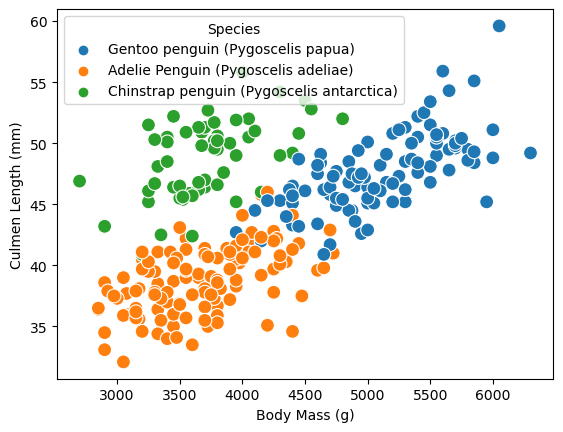

In [25]:
sns.scatterplot(x='Body Mass (g)', y='Culmen Length (mm)', hue='Species', data=train, s=100)

We observe 3 clear clusters on this chart. Adelie and Chinstrap penguins tend to be significantly lighter than Gentoo penguins. However, for the same body mass, Chinstrap penguins have a significantly greater Culmen length. We also observe a general correlation between culmen length and body mass. Based on these two variables alone, our dataset is not linearly separable.

In [38]:
train.groupby(['Species'])[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]].aggregate([np.mean]).round(3)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
,mean,mean,mean,mean,mean,mean
Species,,,,,,
Adelie Penguin (Pygoscelis adeliae),38.710,18.366,189.966,3667.094,8.855,-25.825
Chinstrap penguin (Pygoscelis antarctica),48.720,18.443,195.464,3717.857,9.339,-24.543
Gentoo penguin (Pygoscelis papua),47.757,15.035,217.650,5119.500,8.240,-26.169


The above table gives us a table representing some summary statistics for each penguin. We observe the overage Culmen length, Culmen depth, flipper length, body mass and the ratio of certain isotopes of carbon and nitrogen.

In [35]:
pd.crosstab(index=train['Island'], columns=train['Species'])

Species,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua)
Island,,,
Biscoe,35,0,101
Dream,41,56,0
Torgersen,42,0,0


This table gives us the the number of each type of penguin on each island. We see that Torgersen island only has Adelie penguins, Dream island has no Gentoo penguins, and Biscoe island does not have Chinsstrap penguins. If we had to guess the type of penguin based on its island alone, we could be reasonably successful! If our dataset only had Chinstrap and Gentoo penguins, we could guess the species based on the island with 100% certainty.

In [43]:
pd.crosstab(index=train['Clutch Completion'], columns=train['Species'])

Species,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica),Gentoo penguin (Pygoscelis papua)
Clutch Completion,,,
No,11,11,7
Yes,107,45,94


As we can see, most penguins in each category have clutch completion at approximately the same rates. Let us go back to our first visualization and look at how clutch completion factors into the relationship between body mass and culmen length.

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Culmen Length (mm)'>

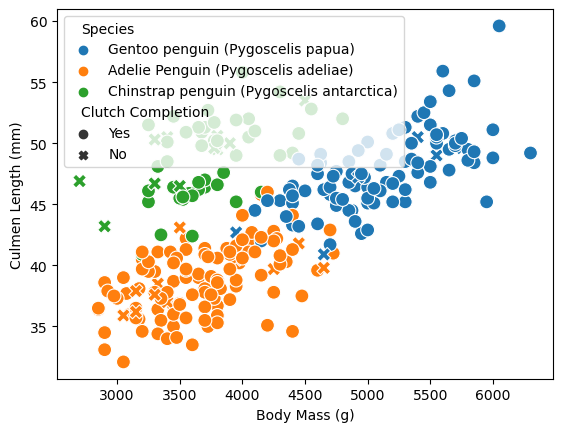

In [45]:
sns.scatterplot(x='Body Mass (g)', y='Culmen Length (mm)', hue='Species', data=train, style='Clutch Completion', s=100)


It is not clear how clutch completion relates to these two features. Let's try the same thing with the island of each penguin.

<AxesSubplot:xlabel='Body Mass (g)', ylabel='Culmen Length (mm)'>

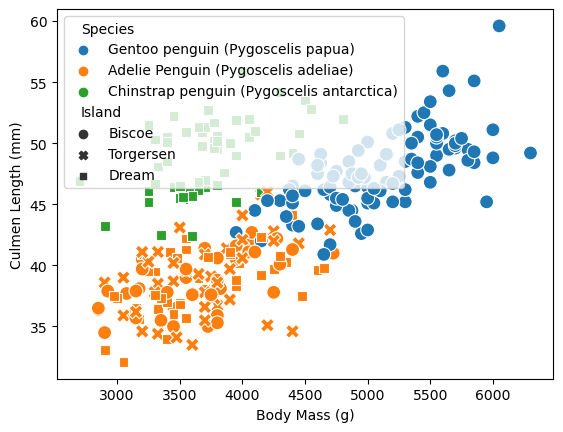

In [46]:
sns.scatterplot(x='Body Mass (g)', y='Culmen Length (mm)', hue='Species', data=train, style='Island', s=100)


# Model

- Find three features of the data and a model trained on those features which achieves 100% testing accuracy. Select these features through a reproducable process
- One feature should be qualitative
- Two should be quantitative.

## Feature selection

In [63]:
import warnings

warnings.filterwarnings("ignore") #I got a whole load of warnings making my notebook look ugly.

from itertools import combinations
from sklearn.linear_model import LogisticRegression
# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Sex", "Island", "Island", "Island"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', "Body Mass (g)", "Delta 15 N (o/oo)","Delta 13 C (o/oo)"]

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = qual_cols + list(pair)
    LR = LogisticRegression()
    LR.fit(X_train[cols], y_train)
    score=LR.score(X_train[cols], y_train)
    if score==1:
        print(cols, score)
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score. 

['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 1.0
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 1.0
['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Culmen Depth (mm)'] 1.0


It looks like we have three combinations giving us 100% accuracy! Let's test one of them again.

In [64]:
from sklearn.linear_model import LogisticRegression

# this counts as 3 features because the two Clutch Completion 
# columns are transformations of a single original measurement. 
# you should find a way to automatically select some better columns
# as suggested in the code block above
cols = ['Island_Biscoe', 'Island_Dream', 'Island_Torgersen', 'Culmen Length (mm)', 'Culmen Depth (mm)']

LR = LogisticRegression()
LR.fit(X_train[cols], y_train)
score=LR.score(X_train[cols], y_train)
print(score)

warnings.resetwarnings() #warnings are still useful! I am reactivating warnings.

1.0


In [65]:
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)
LR.score(X_test[cols], y_test)

1.0

In [11]:
from matplotlib import pyplot as plt
import numpy as np

In [66]:
X_train[cols]

,Island_Biscoe,Island_Dream,Island_Torgersen,Culmen Length (mm),Culmen Depth (mm)
1,1,0,0,45.1,14.5
2,0,0,1,41.4,18.5
3,0,1,0,39.0,18.7
4,0,1,0,50.6,19.4
5,0,1,0,33.1,16.1
...,...,...,...,...,...
269,0,1,0,41.1,17.5
270,1,0,0,45.4,14.6
271,0,0,1,36.2,17.2
272,1,0,0,50.0,15.9


In [15]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

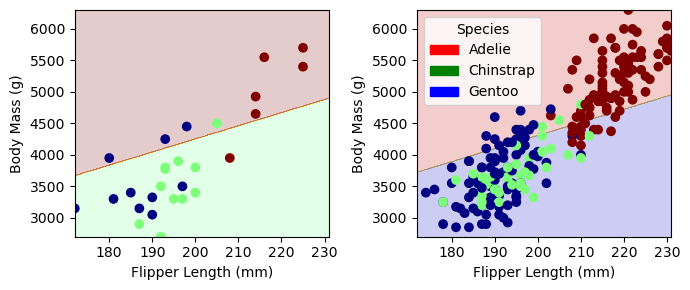

In [16]:
plot_regions(LR, X_train[cols], y_train)